In [1]:
# All import statements
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
from bs4 import BeautifulSoup
from datetime import datetime
import re
import nltk
from nltk.corpus import stopwords

C:\ProgramData\Anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\ProgramData\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\ProgramData\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,id,query,product_title,product_description,median_relevance,relevance_variance
0,1,bridal shower decorations,Accent Pillow with Heart Design - Red/Black,Red satin accent pillow embroidered with a hea...,1,0.000
1,2,led christmas lights,Set of 10 Battery Operated Multi LED Train Chr...,Set of 10 Battery Operated Train Christmas Lig...,4,0.000
2,4,projector,ViewSonic Pro8200 DLP Multimedia Projector,NaN,4,0.471
3,5,wine rack,Concept Housewares WR-44526 Solid-Wood Ceiling...,"Like a silent and sturdy tree, the Southern En...",4,0.000
4,7,light bulb,Wintergreen Lighting Christmas LED Light Bulb ...,"WTGR1011\nFeatures\nNickel base, 60,000 averag...",2,0.471


In [4]:
df.shape

(10158, 6)

## Understanding about the train data

1. Id 
2. Query -- Text about the query.
3. Product_title -- Text about the title of the product.
4. Prodcut_description -- Text about the product description.
5. Median_relevance -- Median relevance score given by 3 raters
6. relevance_variance -- Variance of the relevant scores given by these three raters. 

There are 10158 training data points.




In [5]:
df.median_relevance.value_counts()


4    6171
3    1737
2    1476
1     774
Name: median_relevance, dtype: int64

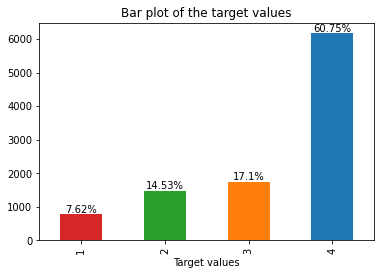

In [6]:
x = df.median_relevance.value_counts().keys()
y = df.median_relevance.value_counts()

ax = df.median_relevance.value_counts().plot(kind='bar',color=['C0', 'C1', 'C2','C3'])
for i,j in zip(x,y):
    plt.annotate(str(round(j/df.shape[0]*100,2))+'%', xy=(i,j), ha='center', va='bottom')
plt.title('Bar plot of the target values')
plt.xlabel('Target values')
plt.show()

## Analysis:

1. Data is very imbalanced
    1. Most of the datapoints are from class - 4
    2. Very few datapoints belong to class - 1


## Check for NAN values. 


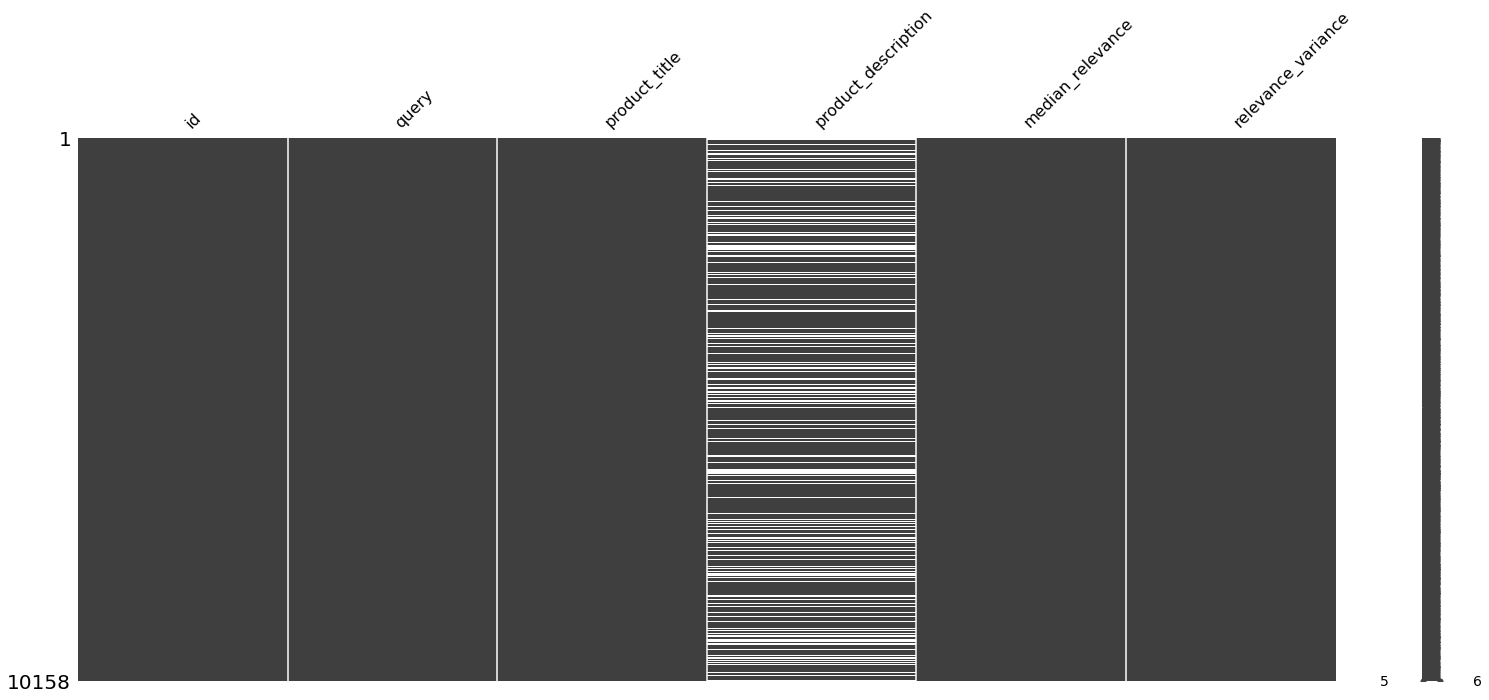

In [7]:
ax = missingno.matrix(df)

In [8]:
print('Percentage of points that are having missing values',round(sum(df.product_description.isna())/df.shape[0]*100,2),'%')

Percentage of points that are having missing values 24.06 %


In [9]:
# I cannot just drop the 24.06% of the points randomly.
# I will fill the missing values with an empty string
df.product_description.fillna('',inplace=True)

In [10]:
# Just confirming if there are any more NAN values.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10158 entries, 0 to 10157
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   10158 non-null  int64  
 1   query                10158 non-null  object 
 2   product_title        10158 non-null  object 
 3   product_description  10158 non-null  object 
 4   median_relevance     10158 non-null  int64  
 5   relevance_variance   10158 non-null  float64
dtypes: float64(1), int64(2), object(3)
memory usage: 476.3+ KB


## Data Analysis of the feature 'Query'

In [11]:
y = df['query'].value_counts().tolist()

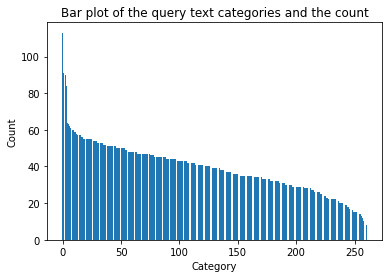

In [12]:
y = df['query'].value_counts().tolist()
y  = sorted(y,reverse=True)
x = range(len(y))
plt.bar(x,y)
plt.ylabel('Count')
plt.xlabel('Category')
plt.title('Bar plot of the query text categories and the count')
plt.show()

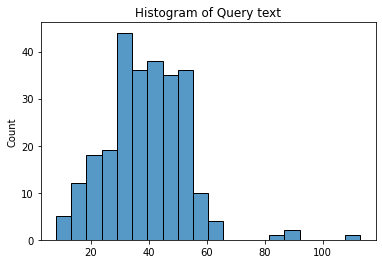

In [13]:
sns.histplot(y)
plt.title('Histogram of Query text')
plt.show()

In [14]:
df['query'].nunique()

261

In [15]:
df['query'].value_counts()

wireless mouse             113
rachel ray cookware         91
memory foam pillow          90
bike lock                   84
16 gb memory card           64
                          ... 
longboard pads              13
silicone toe separators     12
polo bear sweater           10
8 ounce mason jars          10
dollhouse bathtub            8
Name: query, Length: 261, dtype: int64

#### Analysis of Query text

1. Total 261 unique categories
2. Most of the categories are repeated in the range 30-50 times
3. Wireless mouse is the most common query occuring 113 times in the data
4. Dollhouse bathtub was present the least times in the data - 8 times

## Analysis of the feature 'Product title'

In [16]:
y  = df.product_title.value_counts()

In [17]:
out = sum(df.product_title.value_counts()>1)
print('{} product titles are repeated more than once'.format(out))

385 product titles are repeated more than once


In [18]:
out = sum(df.product_title.value_counts()==1)
print('{} product titles occured only once'.format(out))
print('Which is {}% of total data'.format(round(out/df.shape[0]*100,2)))

9323 product titles occured only once
Which is 91.78% of total data


In [19]:
print('Max length of product title is',max(df.product_title.str.len()))

Max length of product title is 250


In [20]:
print('Min length of product title is',min(df.product_title.str.len()))

Min length of product title is 5


In [21]:
product_title_len = df.product_title.str.len()

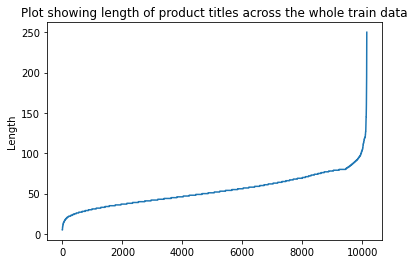

In [22]:
product_title_len = df.product_title.str.len()
plt.plot(sorted(product_title_len))
plt.ylabel('Length')
plt.title('Plot showing length of product titles across the whole train data')
plt.show()

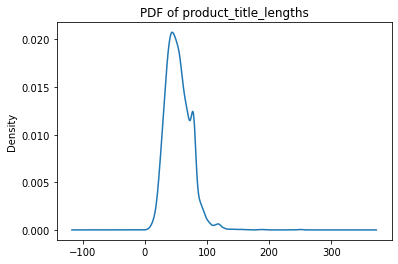

In [23]:
product_title_len.plot.kde()
plt.title('PDF of product_title_lengths')
plt.show()

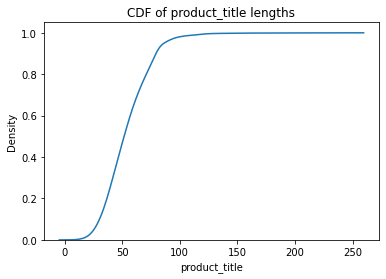

In [24]:
sns.kdeplot(
    data=product_title_len,
    cumulative=True
)
plt.title('CDF of product_title lengths')
plt.show()

In [25]:
for i in range(0,100,10):
    print('{}th percentile value is {}'.format(i,np.percentile(product_title_len,i)))

0th percentile value is 5.0
10th percentile value is 31.0
20th percentile value is 37.0
30th percentile value is 42.0
40th percentile value is 47.0
50th percentile value is 52.0
60th percentile value is 57.0
70th percentile value is 63.0
80th percentile value is 71.0
90th percentile value is 79.0


In [26]:
for i in range(90,100,1):
    print('{}th percentile value is {}'.format(i,np.percentile(product_title_len,i)))

90th percentile value is 79.0
91th percentile value is 80.0
92th percentile value is 80.0
93th percentile value is 80.0
94th percentile value is 83.0
95th percentile value is 86.0
96th percentile value is 89.0
97th percentile value is 93.0
98th percentile value is 99.0
99th percentile value is 114.0


In [27]:
start = 99
for i in range(10):    
    print('{:.1f}th percentile value is {:.1f}'.format(start,np.percentile(product_title_len,start)))
    start+=0.1
out= sum(product_title_len>145)
print('{} product titles have length>145 i.e greater than 99.8 percentile'.format(out))


99.0th percentile value is 114.0
99.1th percentile value is 116.0
99.2th percentile value is 118.0
99.3th percentile value is 119.0
99.4th percentile value is 120.0
99.5th percentile value is 121.0
99.6th percentile value is 126.0
99.7th percentile value is 131.1
99.8th percentile value is 145.0
99.9th percentile value is 179.5
20 product titles have length>145 i.e greater than 99.8 percentile


In [28]:
df['product_title_len'] = df.product_title.str.len()

<AxesSubplot:xlabel='product_title_len', ylabel='median_relevance'>

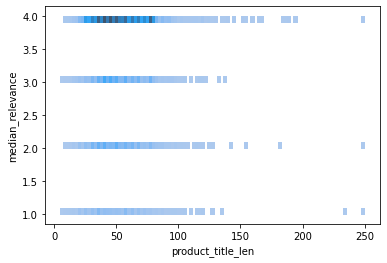

In [29]:
sns.histplot(data = df, x = 'product_title_len', y = 'median_relevance')

#### We cannot draw any analysis  based on the product title length as all the classes are overlapping

## EDA Product Description

In [30]:
df.head()

,id,query,product_title,product_description,median_relevance,relevance_variance,product_title_len
0,1,bridal shower decorations,Accent Pillow with Heart Design - Red/Black,Red satin accent pillow embroidered with a hea...,1,0.000,43
1,2,led christmas lights,Set of 10 Battery Operated Multi LED Train Chr...,Set of 10 Battery Operated Train Christmas Lig...,4,0.000,72
2,4,projector,ViewSonic Pro8200 DLP Multimedia Projector,,4,0.471,42
3,5,wine rack,Concept Housewares WR-44526 Solid-Wood Ceiling...,"Like a silent and sturdy tree, the Southern En...",4,0.000,92
4,7,light bulb,Wintergreen Lighting Christmas LED Light Bulb ...,"WTGR1011\nFeatures\nNickel base, 60,000 averag...",2,0.471,58


In [31]:
df['product_description_len'] = df.product_description.str.len()

In [32]:
print('Max length of product title is',max(df.product_description_len))

Max length of product title is 19436


In [33]:
print('Min length of product title is',min(df.product_description_len))

Min length of product title is 0


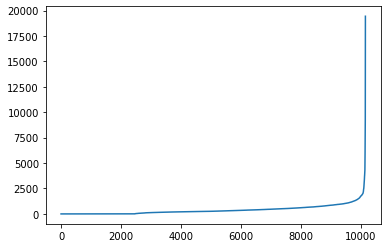

In [34]:
plt.plot(sorted(df.product_description_len))

<AxesSubplot:ylabel='Density'>

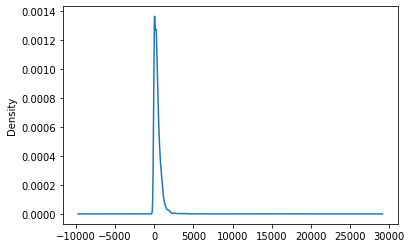

In [35]:
df.product_description_len.plot.kde()

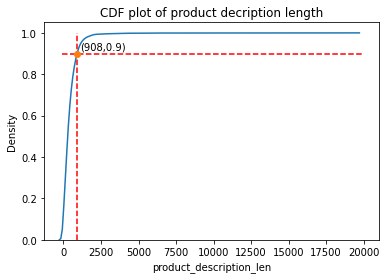

In [36]:
ax = sns.kdeplot(
    data=df.product_description_len,
    cumulative=True
)
data_x, data_y = ax.lines[0].get_data()

yi = 0.9 # coordinate where to find the value of kde curve
xi = np.interp(yi,data_y, data_x)
plt.plot(xi,yi,'o')
plt.hlines(y=0.9,xmin=-100,xmax=20000,linestyles='--',colors='r')
plt.vlines(x=xi,ymin=0,ymax=1,linestyles='--',colors='r')
xi = round(xi)
plt.annotate(xy=(xi+200,yi+0.02),text=('('+str(xi)+','+str(yi)+')'))
plt.title('CDF plot of product decription length')

plt.show()



In [37]:
for i in range(0,100,10):
    print('{}th percentile value is {}'.format(i,np.percentile(df.product_description_len,i)))

0th percentile value is 0.0
10th percentile value is 0.0
20th percentile value is 0.0
30th percentile value is 134.0
40th percentile value is 210.0
50th percentile value is 264.5
60th percentile value is 360.0
70th percentile value is 476.0
80th percentile value is 630.6000000000004
90th percentile value is 901.0


In [38]:
for i in range(90,100,1):
    print('{}th percentile value is {:.1f}'.format(i,np.percentile(df.product_description_len,i)))

90th percentile value is 901.0
91th percentile value is 933.0
92th percentile value is 967.0
93th percentile value is 1013.0
94th percentile value is 1065.6
95th percentile value is 1143.3
96th percentile value is 1240.7
97th percentile value is 1367.3
98th percentile value is 1560.0
99th percentile value is 1930.3


In [39]:
start = 99
for i in range(10):    
    print('{:.1f}th percentile value is {:.1f}'.format(start,np.percentile(df.product_description_len,start)))
    start+=0.1

99.0th percentile value is 1930.3
99.1th percentile value is 1967.7
99.2th percentile value is 2025.0
99.3th percentile value is 2140.7
99.4th percentile value is 2435.8
99.5th percentile value is 2635.8
99.6th percentile value is 3017.2
99.7th percentile value is 3567.5
99.8th percentile value is 4161.1
99.9th percentile value is 6350.0


In [40]:
start = 99.9
for i in range(10):    
    print('{:.2f}th percentile value is {:.1f}'.format(start,np.percentile(df.product_description_len,start)))
    start+=0.01
out= sum(df.product_description_len>10**3)
print('{} product titles have length>145 i.e greater than 99.96 percentile'.format(out))


99.90th percentile value is 6350.0
99.91th percentile value is 6426.0
99.92th percentile value is 6443.1
99.93th percentile value is 6496.6
99.94th percentile value is 8200.5
99.95th percentile value is 9004.5
99.96th percentile value is 9277.3
99.97th percentile value is 15560.2
99.98th percentile value is 17267.7
99.99th percentile value is 18064.0
736 product titles have length>145 i.e greater than 99.96 percentile


In [41]:
# we can truncate sentneces of length>10,000 as 99.96% of the sentences have length <99.97 percentile

In [42]:
out= sum(df.product_description_len>10**3)
print('{} product titles have length>145 i.e greater than 99.96 percentile'.format(out))


736 product titles have length>145 i.e greater than 99.96 percentile


<AxesSubplot:xlabel='product_description_len', ylabel='median_relevance'>

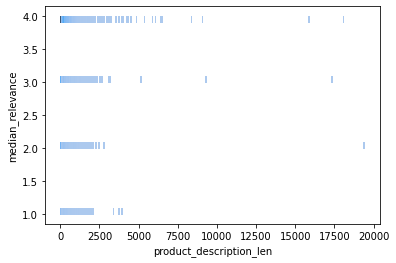

In [43]:
sns.histplot(data = df, x = 'product_description_len', y = 'median_relevance')

In [51]:
df['query_product_title_words_overlap'] = np.zeros(df.shape[0])

In [74]:
df['query_product_title_words_overlap'] = np.zeros(df.shape[0])
for index, query_text in enumerate(df['query']):
    count = 0
    query_text = query_text.lower().split()
    product_title = df.product_title[index].lower() 
    for word in query_text:
        if word in product_title:
            count+=1

    df.loc[index,'query_product_title_words_overlap'] = count
    

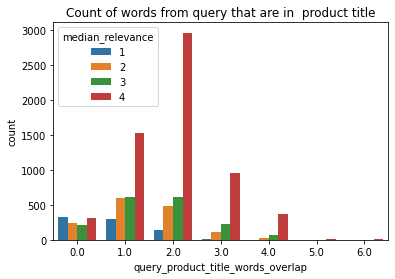

In [86]:
sns.countplot(data = df, x = 'query_product_title_words_overlap', hue='median_relevance')
plt.title('Count of words from query that are in  product title')
plt.show()

In [87]:
df['product_title_query_words_overlap'] = np.zeros(df.shape[0])
for index, product_title in enumerate(df['product_title']):
    count = 0
    product_title = product_title.lower().split() 
    query_text = df.loc[index,'query'].lower() 
    for word in product_title:
        if word in query_text:
            count+=1

    df.loc[index,'product_title_query_words_overlap'] = count
    

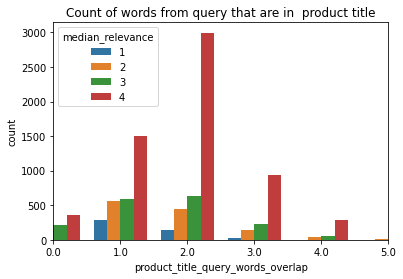

In [92]:
sns.countplot(data = df, x = 'product_title_query_words_overlap', hue='median_relevance')
plt.title('Count of words from query that are in  product title')
plt.xlim(0,5)
plt.show()

In [99]:
df['product_description_product_title_words_overlap'] = np.zeros(df.shape[0])
for index, product_description in enumerate(df['product_description']):
    count = 0
    product_description = product_description.lower().split()
    product_title = df.product_title[index].lower() 
    for word in product_description:
        if word in product_title:
            count+=1

    df.loc[index,'product_description_product_title_words_overlap'] = count


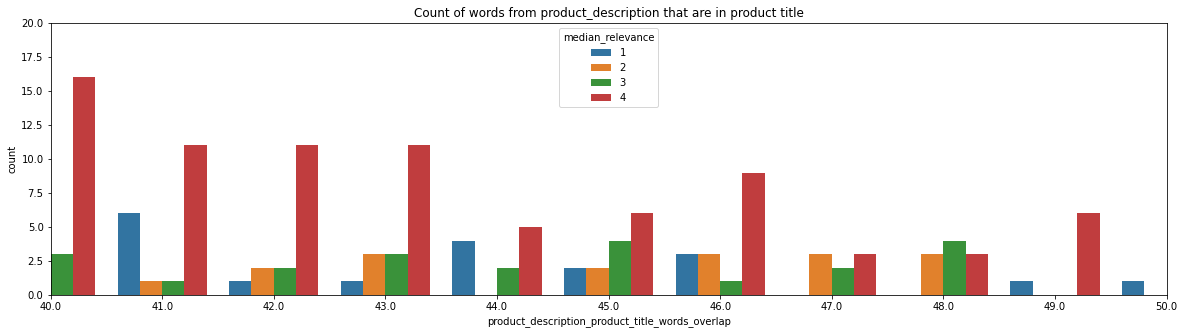

In [112]:
plt.figure(figsize=(20,5))
sns.countplot(data = df, x = 'product_description_product_title_words_overlap', hue='median_relevance')
plt.title('Count of words from product_description that are in product title')
plt.xlim(40,50)
plt.ylim(0,20)
plt.show()

In [103]:
df['query_product_description_words_overlap'] = np.zeros(df.shape[0])
for index, query_text in enumerate(df['query']):
    count = 0
    query_text = query_text.lower().split()
    product_description = df.product_description[index].lower() 
    for word in query_text:
        if word in product_description:
            count+=1

    df.loc[index,'query_product_description_words_overlap'] = count
    

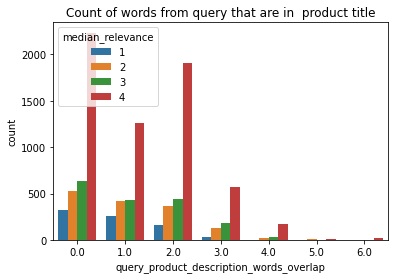

In [104]:
sns.countplot(data = df, x = 'query_product_description_words_overlap', hue='median_relevance')
plt.title('Count of words from query that are in  product title')
plt.show()

## Check for HTML values in each of the text column

In [44]:
def check_html(series):
    start = datetime.now()
    count = 0
    for item in series:
        # Checking for each item is having a HTML data or not
        if(bool(BeautifulSoup(item, "html.parser").find())):
            count+=1
    end = datetime.now()
    print('Time take to run is',end-start)
    print('Number of rows with html code',count)
    

In [45]:
check_html(df['query'])

Time take to run is 0:00:00.974899
Number of rows with html code 0


In [46]:
check_html(df['product_title'])

Time take to run is 0:00:01.006185
Number of rows with html code 0


In [47]:
check_html(df['product_description'])

C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:424: MarkupResemblesLocatorWarning: "http://i104.photobucket.com/albums/m175/champions_on_display/wincraft2013/januaryb/65497012.jpg" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  MarkupResemblesLocatorWarning
C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:424: MarkupResemblesLocatorWarning: "http://i104.photobucket.com/albums/m175/champions_on_display/wincraft2013/januaryb/65516012.jpg" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  MarkupResemblesLocatorWarning


Time take to run is 0:00:00.859704
Number of rows with html code 94


C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:424: MarkupResemblesLocatorWarning: "http://i104.photobucket.com/albums/m175/champions_on_display/wincraft2013/januaryb/6552101" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  MarkupResemblesLocatorWarning


In [48]:
df_test = pd.read_csv('test.csv')

In [49]:
df_test.head()

,id,query,product_title,product_description
0,3,electric griddle,Star-Max 48 in Electric Griddle,NaN
1,6,phillips coffee maker,Philips SENSEO HD7810 WHITE Single Serve Pod C...,NaN
2,9,san francisco 49ers,2013 San Francisco 49ers Clock,A 2013 San Francisco 49ers clock is the ultima...
3,11,aveeno shampoo,AVEENO 10.5FLOZ NRSH SHINE SH,"Water, Ammonium Lauryl Sulfate, Dimethicone, S..."
4,12,flea and tick control for dogs,Merial Frontline Plus Flea and Tick Control fo...,NaN


In [50]:
df_test.shape

(22513, 4)

## Understanding the test data
1. id
2. Query text
3. product_title
4. product_description
5. Target values

The test data given by kaggle is large it has 22513 datapoints and it might have lot of artificial values just to be ignored during evaluation.